In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from script.loss import *
import os
import cv2
import script.models as m
from script.generator import image_mask_generator
import pickle

In [3]:
custom_objects = {
    'dice_loss': dice_loss,
    'dice_coefficient': dice_coefficient
}

In [4]:
def count_nuclei(mask):
    mask_gray = mask.astype(np.uint8)
    _, mask_binary = cv2.threshold(mask_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return (len(contours))

In [5]:
'''meth='Macenko'
ref='img3'
batch_size=1

#train_mask = os.listdir('datasets\\panuke\\train\\mask binary')
#train_mask = ['datasets\\panuke\\train\\mask binary\\' + element for element in train_mask]
test_mask = os.listdir('datasets\\panuke\\test\\mask binary')
test_mask = ['datasets\\panuke\\test\\mask binary\\' + element for element in test_mask]
#test_mask+=train_mask

reference_masks = []
nuclei=[]
for i in range(len(test_mask)):
        masks=(cv2.imread(test_mask[i], cv2.IMREAD_GRAYSCALE))
        masks=masks/255
        reference_masks.append(masks)
        nuclei.append(count_nuclei(masks))
nuclei_sum = np.sum(nuclei)

#train_image  = os.listdir(f'datasets\\panuke\\train\\method_{meth}\\reference_{ref}')
#train_image = [f'datasets\\panuke\\train\\method_{meth}\\reference_{ref}\\' + element for element in train_image]
test_image  = os.listdir(f'datasets\\panuke\\test\\method_{meth}\\reference_{ref}')
test_image = [f'datasets\\panuke\\test\\method_{meth}\\reference_{ref}\\' + element for element in test_image]
#test_image+=train_image

models=[]
for i in range(5):
    m=tf.keras.models.load_model(f"Models\\attunet\\method_{meth}\\reference_{ref}\\{i+1}",custom_objects=custom_objects)
    models.append(m)

dice = []
pred=[]
bpq=[]
aji=[]
n_dice=[]


for model_index, model in enumerate(models):
    d,a,b,nd=[],[],[],[]
    print(f"Making predictions with Model {model_index+1}/{5}")
    test_generator = image_mask_generator(test_image, test_mask,batch_size)

    predictions = model.predict(test_generator, steps=(len(test_image) // batch_size))
    predictions=tf.cast((tf.squeeze(predictions) > 0.5), tf.int32)
    pred.append(predictions)
    for i in range(len(test_mask)):
        d.append(dice_coefficient(reference_masks[i],predictions[i]).numpy())
        nd.append(nuclei[i]*(dice_coefficient(reference_masks[i],predictions[i]).numpy())/nuclei_sum)
        a.append(get_fast_aji(reference_masks[i],predictions[i]))
        b.append(get_fast_pq(reference_masks[i],predictions[i]))
    dice.append(np.sum(d)/(len(test_mask)))
    aji.append(np.sum(a)/(len(test_mask)))
    bpq.append(np.sum(b)/(len(test_mask)))
    n_dice.append(np.sum(nd))

print(dice)
print(aji)
print(bpq)
print(n_dice)'''

'meth=\'Macenko\'\nref=\'img3\'\nbatch_size=1\n\n#train_mask = os.listdir(\'datasets\\panuke\\train\\mask binary\')\n#train_mask = [\'datasets\\panuke\\train\\mask binary\\\' + element for element in train_mask]\ntest_mask = os.listdir(\'datasets\\panuke\\test\\mask binary\')\ntest_mask = [\'datasets\\panuke\\test\\mask binary\\\' + element for element in test_mask]\n#test_mask+=train_mask\n\nreference_masks = []\nnuclei=[]\nfor i in range(len(test_mask)):\n        masks=(cv2.imread(test_mask[i], cv2.IMREAD_GRAYSCALE))\n        masks=masks/255\n        reference_masks.append(masks)\n        nuclei.append(count_nuclei(masks))\nnuclei_sum = np.sum(nuclei)\n\n#train_image  = os.listdir(f\'datasets\\panuke\\train\\method_{meth}\\reference_{ref}\')\n#train_image = [f\'datasets\\panuke\\train\\method_{meth}\\reference_{ref}\\\' + element for element in train_image]\ntest_image  = os.listdir(f\'datasets\\panuke\\test\\method_{meth}\\reference_{ref}\')\ntest_image = [f\'datasets\\panuke\\test\

In [6]:
dataset='panuke'
result={}

In [7]:
#train_mask = os.listdir(f'datasets\\{dataset}\\train\\mask binary')
#train_mask = [f'datasets\\{dataset}\\train\\mask binary\\' + element for element in train_mask]
test_mask = os.listdir(f'datasets\\{dataset}\\test\\mask binary')
test_mask = [f'datasets\\{dataset}\\test\\mask binary\\' + element for element in test_mask]
#test_mask+=train_mask

reference_masks = []
nuclei=[]
for i in range(len(test_mask)):
        masks=(cv2.imread(test_mask[i], cv2.IMREAD_GRAYSCALE))
        masks=masks/255
        reference_masks.append(masks)
        nuclei.append(count_nuclei(masks))
nuclei_sum = np.sum(nuclei)

In [8]:
"""if not os.path.exists(f'results\\nuln\\pq\\none\\none'):
                os.makedirs(f'results\\nuln\\pq\\none\\none')

if not os.path.exists(f'results\\nuln\\pq\\random\\random'):
                os.makedirs(f'results\\nuln\\pq\\random\\random')

methods=["Reinhard", "Ruifrok", "Macenko", "Vahadane"]
references=['img1','img2','img3','img4','img5','img6']
for method in methods:
    for reference in references:
        if not os.path.exists(f'results\\nuln\\pq\\{method}\\{reference}'):
                os.makedirs(f'results\\nuln\\pq\\{method}\\{reference}')"""

'if not os.path.exists(f\'results\\nuln\\pq\\none\\none\'):\n                os.makedirs(f\'results\\nuln\\pq\\none\\none\')\n\nif not os.path.exists(f\'results\\nuln\\pq\\random\\random\'):\n                os.makedirs(f\'results\\nuln\\pq\\random\\random\')\n\nmethods=["Reinhard", "Ruifrok", "Macenko", "Vahadane"]\nreferences=[\'img1\',\'img2\',\'img3\',\'img4\',\'img5\',\'img6\']\nfor method in methods:\n    for reference in references:\n        if not os.path.exists(f\'results\\nuln\\pq\\{method}\\{reference}\'):\n                os.makedirs(f\'results\\nuln\\pq\\{method}\\{reference}\')'

In [9]:
'''import os
import glob
directory = 'results/panuke'  # Change this to your directory
extension = '.pkl'  # Change this to the extension of the files you want to remove

# Find all files with the given extension in the directory and its subdirectories
files_to_remove = glob.glob(os.path.join(directory, '**', f'*{extension}'), recursive=True)

# Remove each file found
for file_path in files_to_remove:
    try:
        os.remove(file_path)
        print(f'Removed: {file_path}')
    except OSError as e:
        print(f'Error: {file_path} : {e.strerror}')'''

"import os\nimport glob\ndirectory = 'results/panuke'  # Change this to your directory\nextension = '.pkl'  # Change this to the extension of the files you want to remove\n\n# Find all files with the given extension in the directory and its subdirectories\nfiles_to_remove = glob.glob(os.path.join(directory, '**', f'*{extension}'), recursive=True)\n\n# Remove each file found\nfor file_path in files_to_remove:\n    try:\n        os.remove(file_path)\n        print(f'Removed: {file_path}')\n    except OSError as e:\n        print(f'Error: {file_path} : {e.strerror}')"

In [10]:
meth='none'
ref='none'
batch_size=1
result['none:none']={}

#train_image  = os.listdir(f'datasets\\{dataset}\\train\\method_{meth}\\reference_{ref}')
#train_image = [f'datasets\\{dataset}\\train\\method_{meth}\\reference_{ref}\\' + element for element in train_image]
test_image  = os.listdir(f'datasets\\{dataset}\\test\\method_{meth}\\reference_{ref}')
test_image = [f'datasets\\{dataset}\\test\\method_{meth}\\reference_{ref}\\' + element for element in test_image]

#test_image+=train_image


models=[]
for i in range(5):
    m=tf.keras.models.load_model(f"Models\\attunet\\method_{meth}\\reference_{ref}\\{i+1}",custom_objects=custom_objects)
    models.append(m)

dice = []
pred=[]
bpq=[]
aji=[]
n_dice=[]

for model_index, model in enumerate(models):
    d,a,b,nd=[],[],[],[]
    print(f"Making predictions with Model {model_index+1}/{5}")
    test_generator = image_mask_generator(test_image, test_mask,batch_size)

    predictions = model.predict(test_generator, steps=(len(test_image) // batch_size))
    predictions=tf.cast((tf.squeeze(predictions) > 0.5), tf.int32)
    pred.append(predictions)
    for i in range(len(test_mask)):
        d.append(dice_coefficient(reference_masks[i],predictions[i]).numpy())
        nd.append(nuclei[i]*(dice_coefficient(reference_masks[i],predictions[i]).numpy())/nuclei_sum)
        a.append(get_fast_aji(reference_masks[i],predictions[i]))
        b.append(get_fast_pq(reference_masks[i],predictions[i]))
    
    
    with open(f'results\\{dataset}\\dice\\{meth}\\{ref}\\dice_{model_index+1}.pkl', 'wb') as f:
        pickle.dump(d, f)
    with open(f'results\\{dataset}\\aji\\{meth}\\{ref}\\aji_{model_index+1}.pkl', 'wb') as f:
        pickle.dump(a, f)
    with open(f'results\\{dataset}\\pq\\{meth}\\{ref}\\pq_{model_index+1}.pkl', 'wb') as f:
        pickle.dump(b, f)
    with open(f'results\\{dataset}\\ndice\\{meth}\\{ref}\\ndice_{model_index+1}.pkl', 'wb') as f:
        pickle.dump(nd, f)
    
    dice.append(np.sum(d)/(len(test_mask)))
    aji.append(np.sum(a)/(len(test_mask)))
    bpq.append(np.sum(b)/(len(test_mask)))
    n_dice.append(np.sum(nd))


result['none:none']['dice']=dice
result['none:none']['aji']=aji
result['none:none']['pq']=bpq
result['none:none']['nuclei_dice']=n_dice

Making predictions with Model 1/5
1571/1571 [==============================] - 28s 16ms/step
Making predictions with Model 2/5
1571/1571 [==============================] - 7s 4ms/step
Making predictions with Model 3/5
1571/1571 [==============================] - 7s 4ms/step
Making predictions with Model 4/5
1571/1571 [==============================] - 7s 4ms/step
Making predictions with Model 5/5
1571/1571 [==============================] - 7s 4ms/step


In [11]:
methods=["Reinhard", "Ruifrok", "Macenko", "Vahadane"]
references=['img1','img2','img3','img4','img5','img6']
batch_size=1
temp=1
for method in methods:
    for reference in references:
        print(temp)
        temp+=1
        result[f'{method}:{reference}']={}

        #train_image  = os.listdir(f'datasets\\{dataset}\\train\\method_{method}\\reference_{reference}')
        #train_image = [f'datasets\\{dataset}\\train\\method_{method}\\reference_{reference}\\' + element for element in train_image]
        test_image  = os.listdir(f'datasets\\{dataset}\\test\\method_{method}\\reference_{reference}')
        test_image = [f'datasets\\{dataset}\\test\\method_{method}\\reference_{reference}\\' + element for element in test_image]
        #test_image+=train_image
        

        models=[]
        for k in range(5):
            m=tf.keras.models.load_model(f"Models\\attunet\\method_{method}\\reference_{reference}\\{k+1}",custom_objects=custom_objects)
            models.append(m)
    
        dice = []
        pred=[]
        bpq=[]
        aji=[]
        n_dice=[]

        for model_index, model in enumerate(models):
            d,a,b,nd=[],[],[],[]
            print(f"Making predictions with Model {model_index+1}/{5}")
            test_generator = image_mask_generator(test_image, test_mask,batch_size)

            predictions = model.predict(test_generator, steps=(len(test_image) // batch_size))
            predictions=tf.cast((tf.squeeze(predictions) > 0.5), tf.int32)
            pred.append(predictions)
            for i in range(len(test_mask)):
                d.append(dice_coefficient(reference_masks[i],predictions[i]).numpy())
                nd.append(nuclei[i]*(dice_coefficient(reference_masks[i],predictions[i]).numpy())/nuclei_sum)
                a.append(get_fast_aji(reference_masks[i],predictions[i]))
                b.append(get_fast_pq(reference_masks[i],predictions[i]))

            with open(f'results\\{dataset}\\dice\\{method}\\{reference}\\dice_{model_index+1}.pkl', 'wb') as f:
                pickle.dump(d, f)
            with open(f'results\\{dataset}\\aji\\{method}\\{reference}\\aji_{model_index+1}.pkl', 'wb') as f:
                pickle.dump(a, f)
            with open(f'results\\{dataset}\\pq\\{method}\\{reference}\\pq_{model_index+1}.pkl', 'wb') as f:
                pickle.dump(b, f)
            with open(f'results\\{dataset}\\ndice\\{method}\\{reference}\\ndice_{model_index+1}.pkl', 'wb') as f:
                pickle.dump(nd, f)

            dice.append(np.sum(d)/(len(test_mask)))
            aji.append(np.sum(a)/(len(test_mask)))
            bpq.append(np.sum(b)/(len(test_mask)))
            n_dice.append(np.sum(nd))
        result[f'{method}:{reference}']['dice']=dice
        result[f'{method}:{reference}']['aji']=aji
        result[f'{method}:{reference}']['pq']=bpq
        result[f'{method}:{reference}']['nuclei_dice']=n_dice
        

1
Making predictions with Model 1/5
1571/1571 [==============================] - 16s 10ms/step
Making predictions with Model 2/5
1571/1571 [==============================] - 7s 5ms/step
Making predictions with Model 3/5
1571/1571 [==============================] - 7s 4ms/step
Making predictions with Model 4/5
1571/1571 [==============================] - 7s 4ms/step
Making predictions with Model 5/5
1571/1571 [==============================] - 7s 4ms/step
2
Making predictions with Model 1/5
1571/1571 [==============================] - 25s 15ms/step
Making predictions with Model 2/5
1571/1571 [==============================] - 7s 5ms/step
Making predictions with Model 3/5
1571/1571 [==============================] - 7s 4ms/step
Making predictions with Model 4/5
1571/1571 [==============================] - 7s 5ms/step
Making predictions with Model 5/5
1571/1571 [==============================] - 7s 4ms/step
3
Making predictions with Model 1/5
1571/1571 [==============================] - 1

In [12]:
meth='random'
ref='random'
batch_size=1
result['random:random']={}

#train_image  = os.listdir(f'datasets\\{dataset}\\train\\method_{meth}\\reference_{ref}')
#train_image = [f'datasets\\{dataset}\\train\\method_{meth}\\reference_{ref}\\' + element for element in train_image]
test_image  = os.listdir(f'datasets\\{dataset}\\test\\method_{meth}\\reference_{ref}')
test_image = [f'datasets\\{dataset}\\test\\method_{meth}\\reference_{ref}\\' + element for element in test_image]
#test_image+=train_image

models=[]
for i in range(5):
    m=tf.keras.models.load_model(f"Models\\attunet\\method_{meth}\\reference_{ref}\\{i+1}",custom_objects=custom_objects)
    models.append(m)

dice = []
pred=[]
bpq=[]
aji=[]
n_dice=[]


for model_index, model in enumerate(models):
    d,a,b,nd=[],[],[],[]
    print(f"Making predictions with Model {model_index+1}/{5}")
    test_generator = image_mask_generator(test_image, test_mask,batch_size)

    predictions = model.predict(test_generator, steps=(len(test_image) // batch_size))
    predictions=tf.cast((tf.squeeze(predictions) > 0.5), tf.int32)
    pred.append(predictions)
    for i in range(len(test_mask)):
        d.append(dice_coefficient(reference_masks[i],predictions[i]).numpy())
        nd.append(nuclei[i]*(dice_coefficient(reference_masks[i],predictions[i]).numpy())/nuclei_sum)
        a.append(get_fast_aji(reference_masks[i],predictions[i]))
        b.append(get_fast_pq(reference_masks[i],predictions[i]))

    with open(f'results\\{dataset}\\dice\\{meth}\\{ref}\\dice_{model_index+1}.pkl', 'wb') as f:
        pickle.dump(d, f)
    with open(f'results\\{dataset}\\aji\\{meth}\\{ref}\\aji_{model_index+1}.pkl', 'wb') as f:
        pickle.dump(a, f)
    with open(f'results\\{dataset}\\pq\\{meth}\\{ref}\\pq_{model_index+1}.pkl', 'wb') as f:
        pickle.dump(b, f)
    with open(f'results\\{dataset}\\ndice\\{meth}\\{ref}\\ndice_{model_index+1}.pkl', 'wb') as f:
        pickle.dump(nd, f)
    dice.append(np.sum(d)/(len(test_mask)))
    aji.append(np.sum(a)/(len(test_mask)))
    bpq.append(np.sum(b)/(len(test_mask)))
    n_dice.append(np.sum(nd))

result['random:random']['dice']=dice
result['random:random']['aji']=aji
result['random:random']['pq']=bpq
result['random:random']['nuclei_dice']=n_dice

Making predictions with Model 1/5
1571/1571 [==============================] - 27s 17ms/step
Making predictions with Model 2/5
1571/1571 [==============================] - 20s 12ms/step
Making predictions with Model 3/5
1571/1571 [==============================] - 18s 11ms/step
Making predictions with Model 4/5
1571/1571 [==============================] - 19s 11ms/step
Making predictions with Model 5/5
1571/1571 [==============================] - 18s 11ms/step


In [13]:
with open(f'results\\{dataset}\\total.pkl', 'wb') as f:
                pickle.dump(result, f)

In [14]:
result

{'none:none': {'dice': [0.7769869410407384,
   0.7845261620534294,
   0.7838306487706874,
   0.7807921780514003,
   0.7851034901386458],
  'aji': [0.6238690991080433,
   0.6339873875144126,
   0.6328049054398606,
   0.6259754724789047,
   0.6347022198378336],
  'pq': [0.5804105903306039,
   0.5992462770021704,
   0.5967990368050852,
   0.5848285787268978,
   0.5985108906747844],
  'nuclei_dice': [0.8079312164072026,
   0.815794249123923,
   0.8132131631553932,
   0.8068423237351494,
   0.8151744817202904]},
 'Reinhard:img1': {'dice': [0.7556449166534055,
   0.759168249721515,
   0.7511391157105347,
   0.7486592468222868,
   0.7534785765436028],
  'aji': [0.6276032553239158,
   0.6259632867482172,
   0.627109342988103,
   0.6241332545181428,
   0.6260635006667745],
  'pq': [0.5912902213947508,
   0.586929556999691,
   0.5932917993505533,
   0.584405178689768,
   0.5919641244771543],
  'nuclei_dice': [0.812204360742447,
   0.809834963255461,
   0.8151668906508711,
   0.810420130524987,
 

In [15]:
{key: value for key, value in result.items() if 'Reinhard' in key}

{'Reinhard:img1': {'dice': [0.7556449166534055,
   0.759168249721515,
   0.7511391157105347,
   0.7486592468222868,
   0.7534785765436028],
  'aji': [0.6276032553239158,
   0.6259632867482172,
   0.627109342988103,
   0.6241332545181428,
   0.6260635006667745],
  'pq': [0.5912902213947508,
   0.586929556999691,
   0.5932917993505533,
   0.584405178689768,
   0.5919641244771543],
  'nuclei_dice': [0.812204360742447,
   0.809834963255461,
   0.8151668906508711,
   0.810420130524987,
   0.8117710081508888]},
 'Reinhard:img2': {'dice': [0.7548024683223266,
   0.7538044599876671,
   0.7525299868714195,
   0.7460070342337684,
   0.7501422729103676],
  'aji': [0.6190444158473594,
   0.6262096864680167,
   0.6188446173191373,
   0.6220581304320606,
   0.6235007012034516],
  'pq': [0.5791838426666477,
   0.591474873359131,
   0.578661521870927,
   0.5814269559082679,
   0.584271494211188],
  'nuclei_dice': [0.8038991369285449,
   0.8138148378158172,
   0.806643765147679,
   0.810555680738759,
 

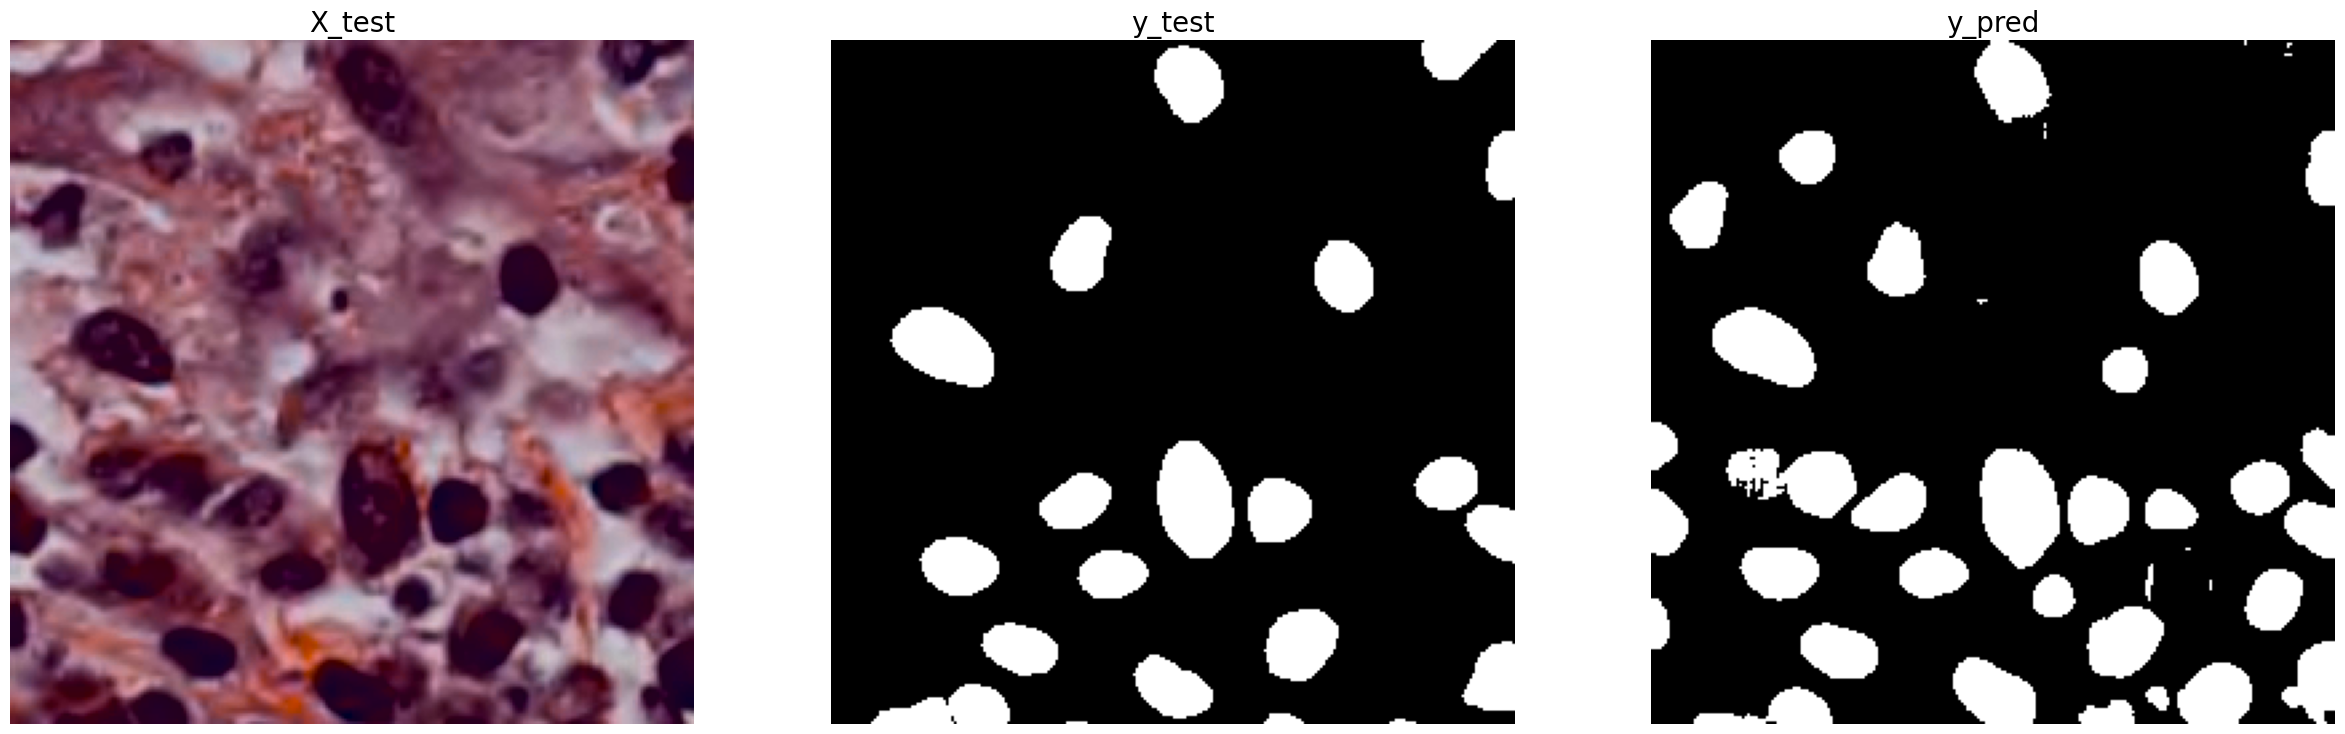

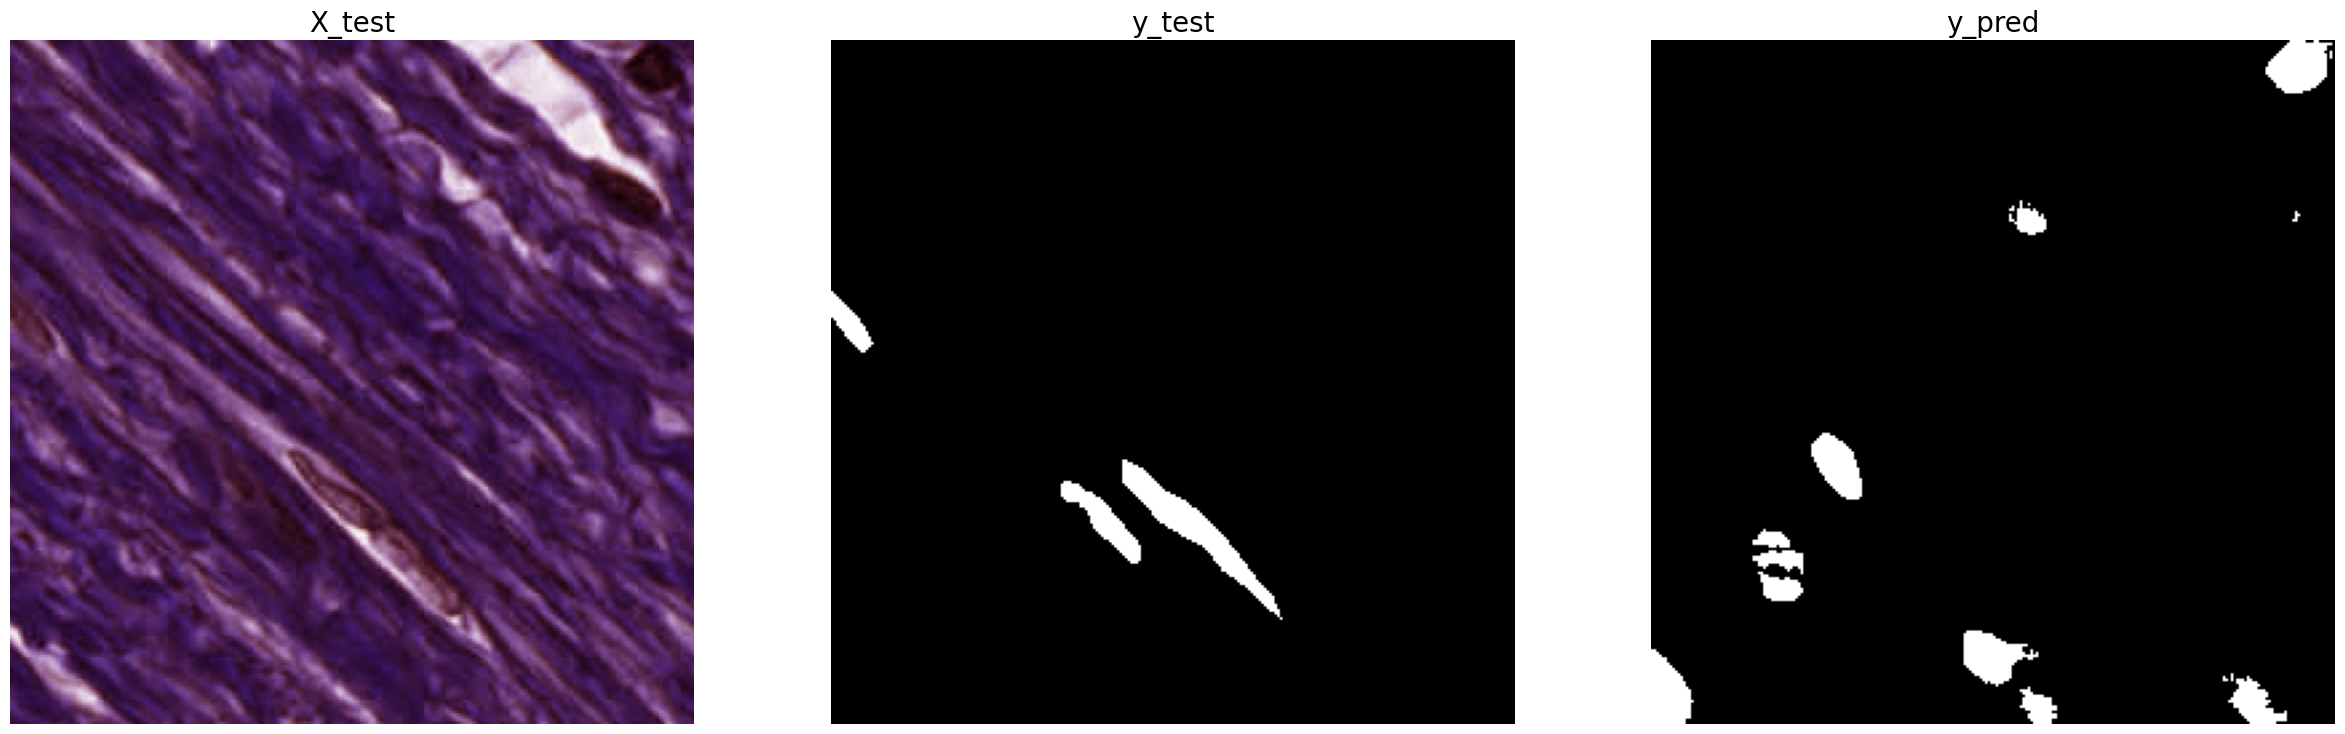

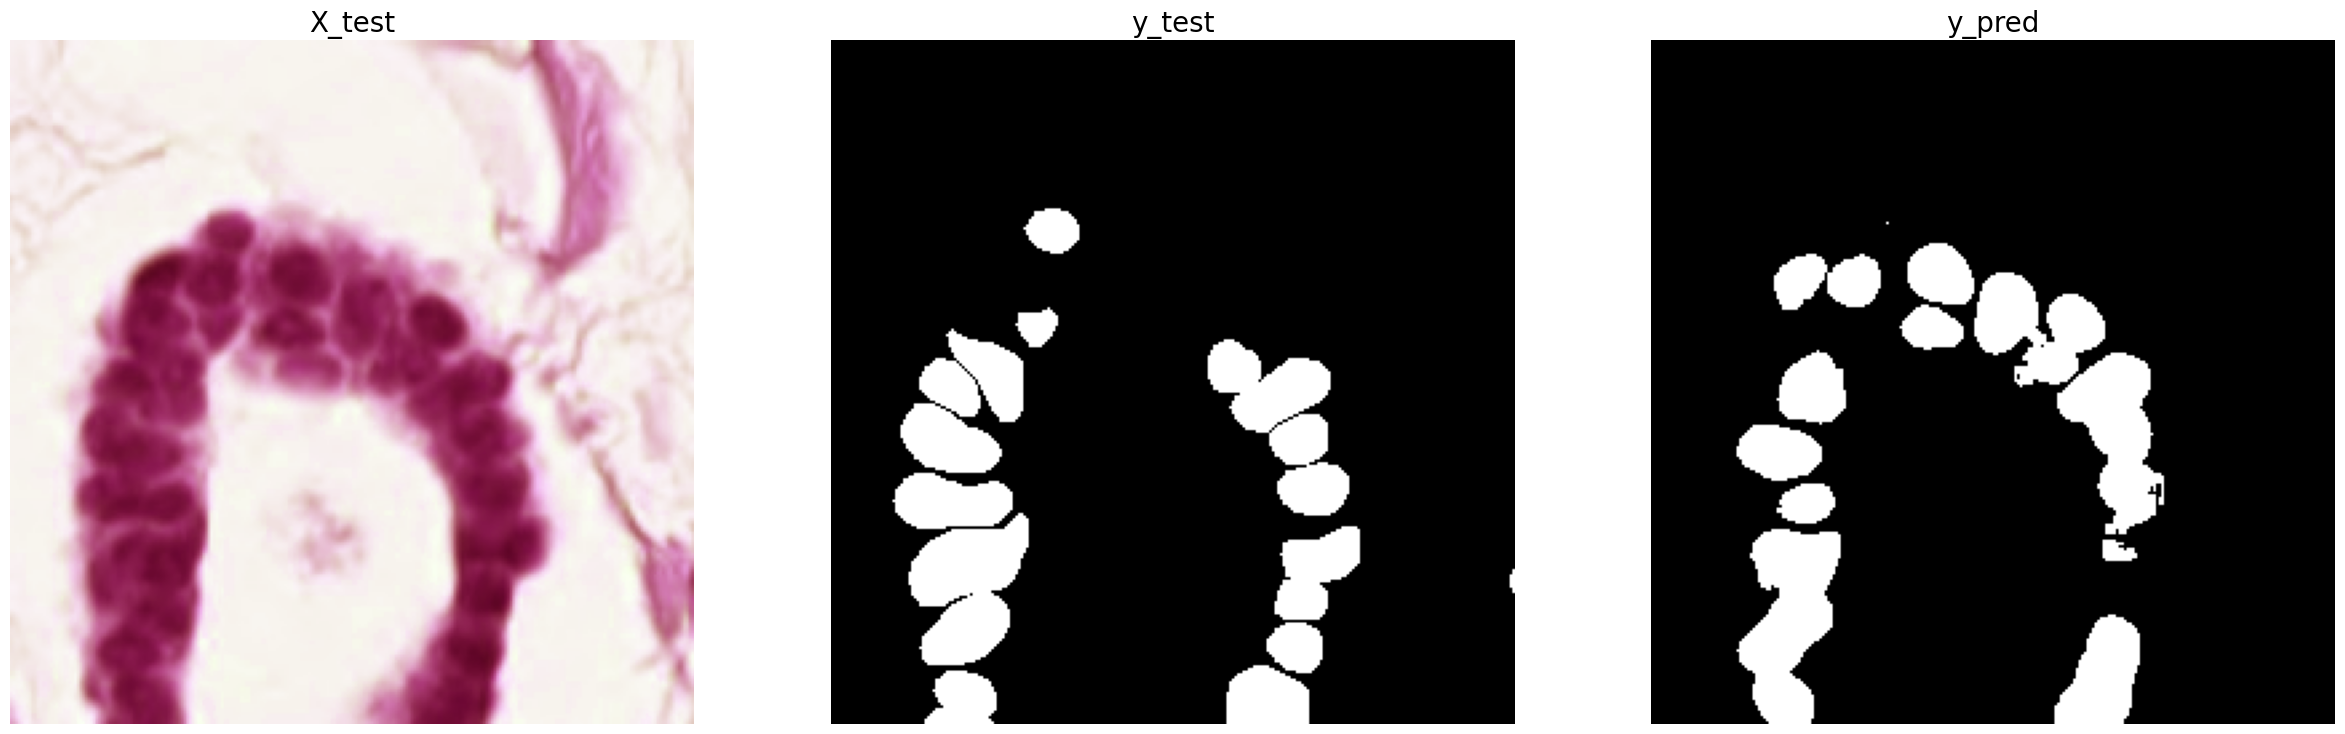

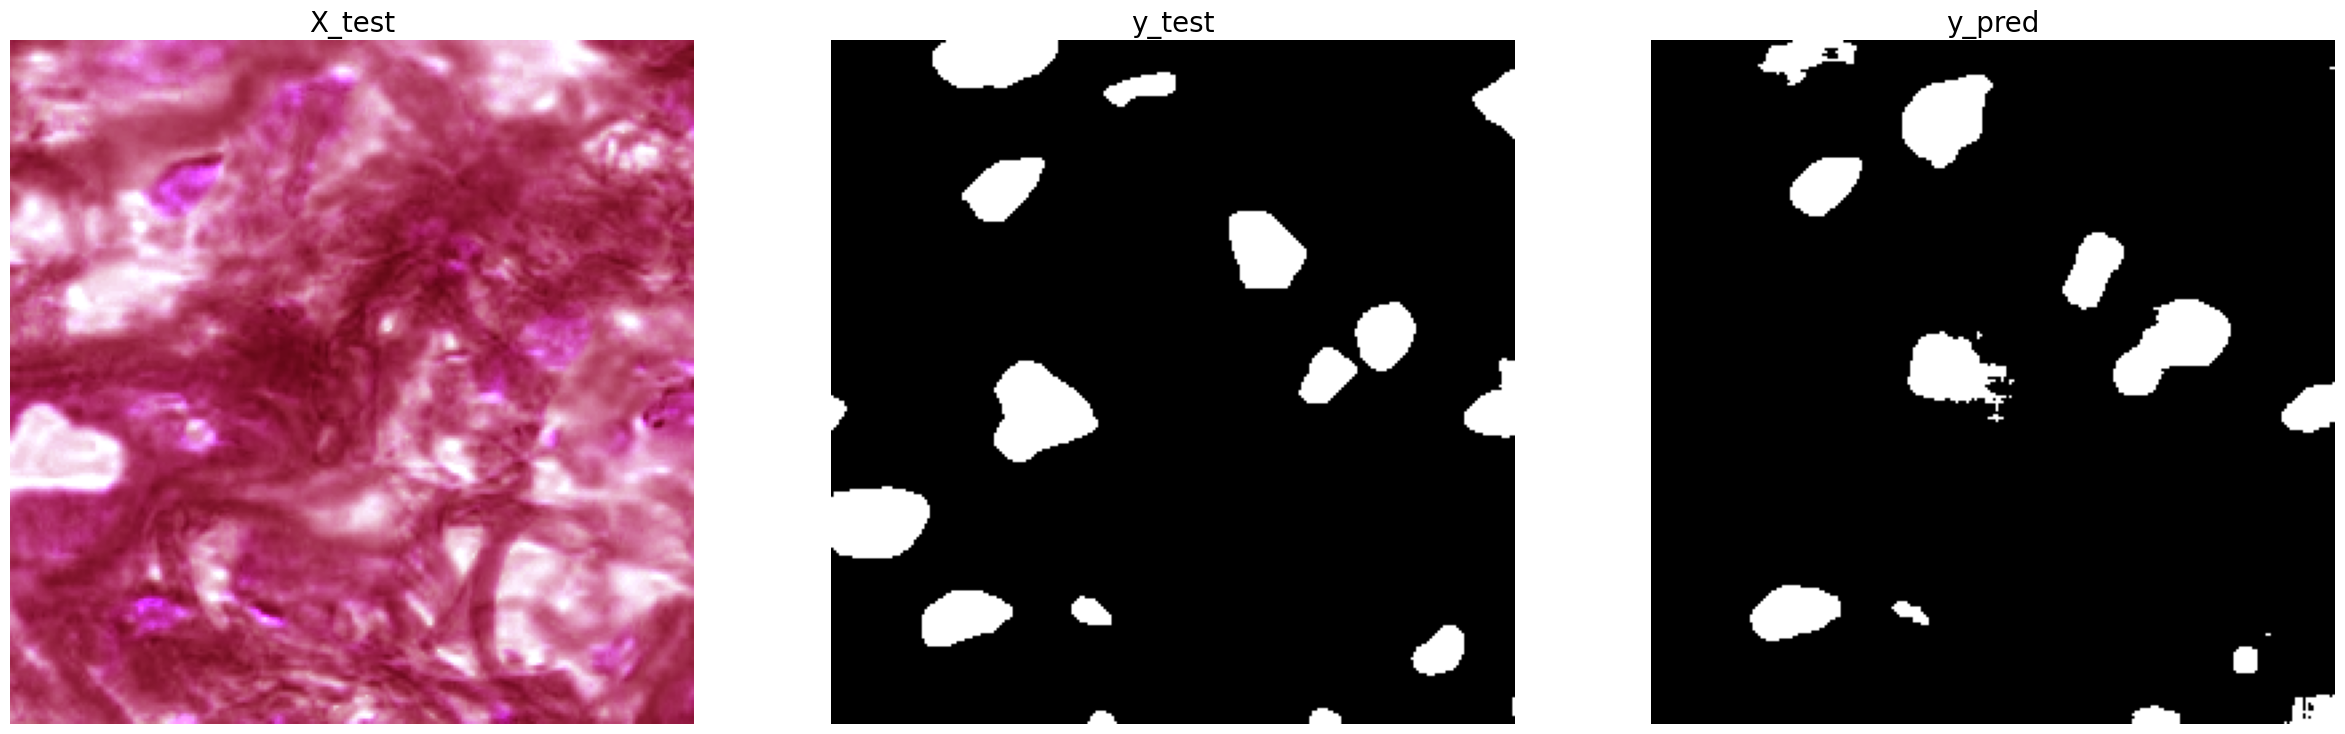

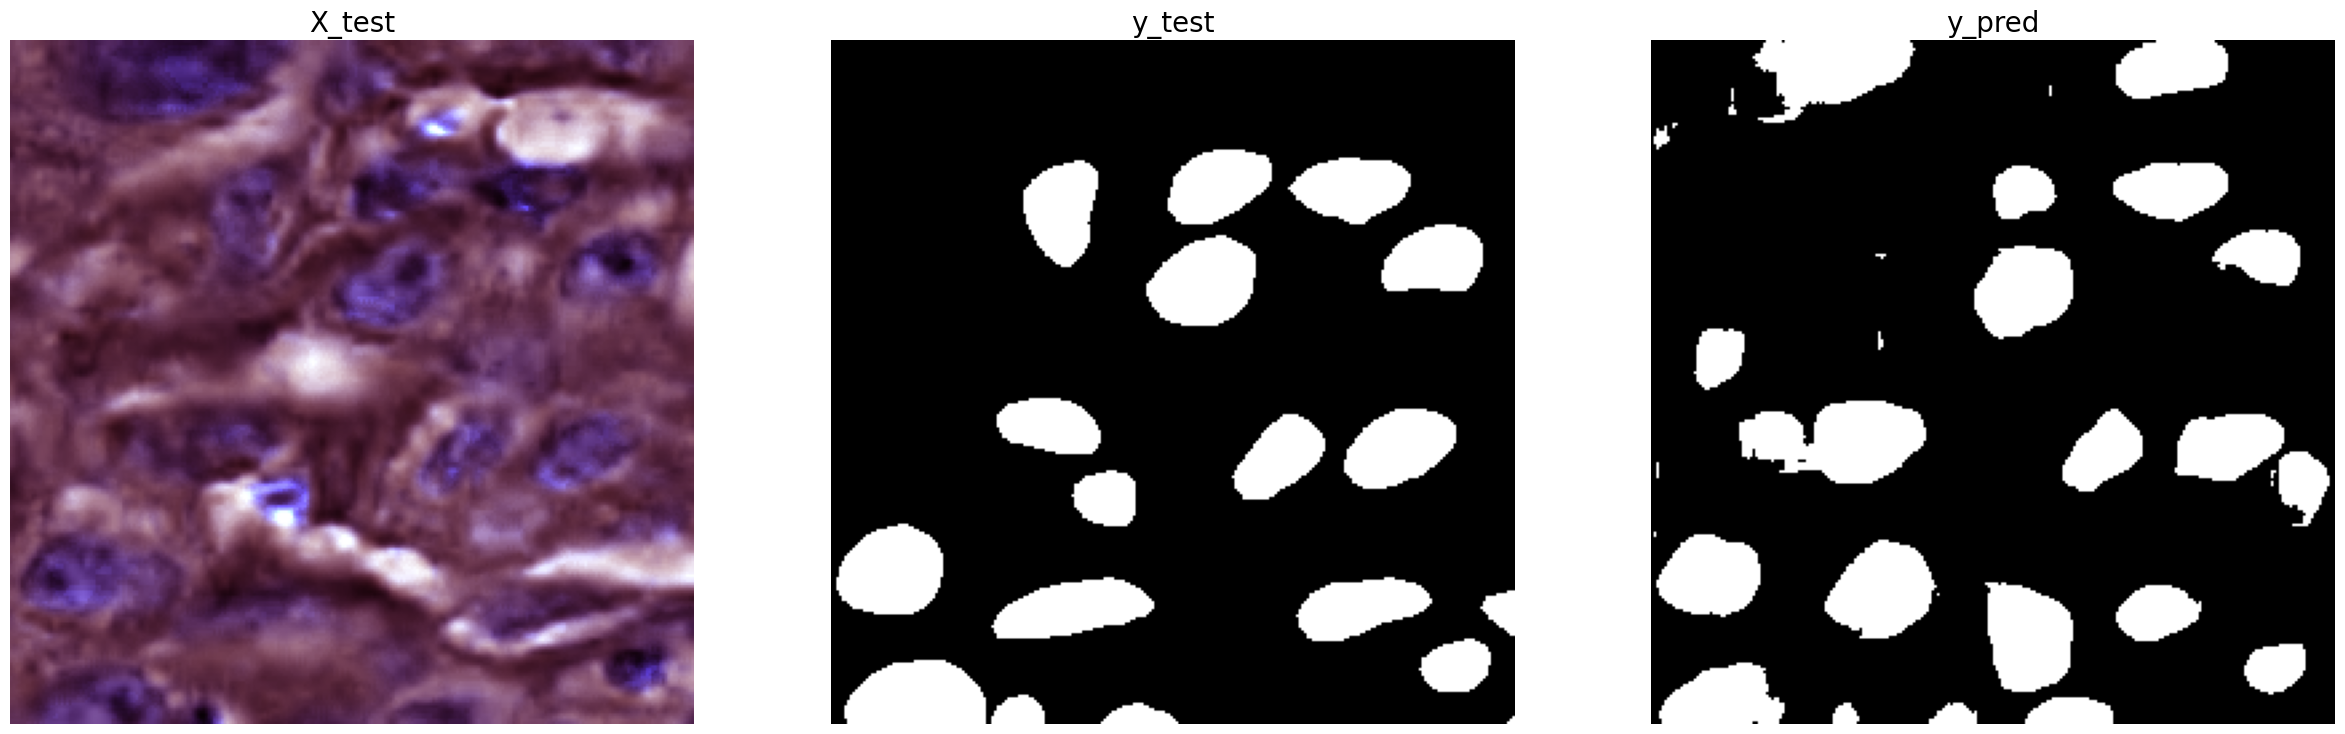

In [16]:
for i in range(5):
    j=1
    plt.figure(figsize=(30,60))
    plt.subplot(5,3,j)
    plt.imshow(cv2.cvtColor(cv2.imread(test_image[i]), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('X_test', fontsize = 20)
    j+=1

    plt.subplot(5,3,j)
    plt.imshow(reference_masks[i],cmap='gray')
    plt.axis('off')
    plt.title('y_test', fontsize = 20)
    j+=1

    plt.subplot(5,3,j)
    plt.imshow(pred[0][i],cmap='gray')
    plt.axis('off')
    plt.title('y_pred', fontsize = 20)
    j+=1

plt.show()